In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\Ice_cream selling data_Polynomial_data.csv")

In [3]:
dataset.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


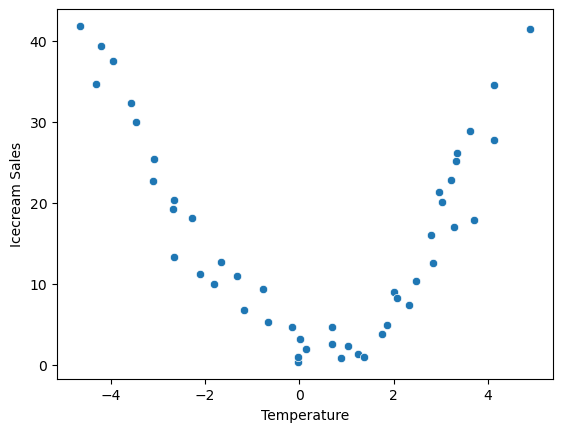

In [4]:
sns.scatterplot(data=dataset, x= dataset["Temperature (°C)"], y=dataset["Ice Cream Sales (units)"])
plt.xlabel("Temperature")
plt.ylabel("Icecream Sales")
plt.show()

In [5]:
dataset.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In [17]:
#first fit and transform the polynomial into linear

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
X = dataset[["Temperature (°C)"]]
y = dataset["Ice Cream Sales (units)"]

In [13]:
pf = PolynomialFeatures(degree=2)

In [14]:
pf.fit(X)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [16]:
X_new = pf.transform(X)
X_new

array([[ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01],
       [ 1.00000000e+00, -4.21398476e+00,  1.77576676e+01],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
       [ 1.00000000e+00, -3.45571170e+00,  1.19419433e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
       [ 1.00000000e+00, -3.08130332e+00,  9.49443018e+00],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00],
       [ 1.00000000e+00, -2.65149803e+00,  7.03044182e+00],
       [ 1.00000000e+00, -2.28826400e+00,  5.23615213e+00],
       [ 1.00000000e+00, -2.11186969e+00,  4.45999359e+00],
       [ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00],
       [ 1.00000000e+00, -1.66034773e+00,  2.75675458e+00],
       [ 1.00000000e+00, -1.32637898e+00,  1.75928121e+00],
       [ 1.00000000e+00, -1.17312327e+00

In [18]:
#now train the converted linear

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
# help(train_test_split)

In [22]:
 X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
lr.score(X_test, y_test)

0.9037767566235404

In [27]:
lr.coef_

array([ 0.        , -0.61839814,  1.83054836])

In [28]:
lr.intercept_

np.float64(2.9000094759426105)

In [35]:
pred = lr.predict(X_new)

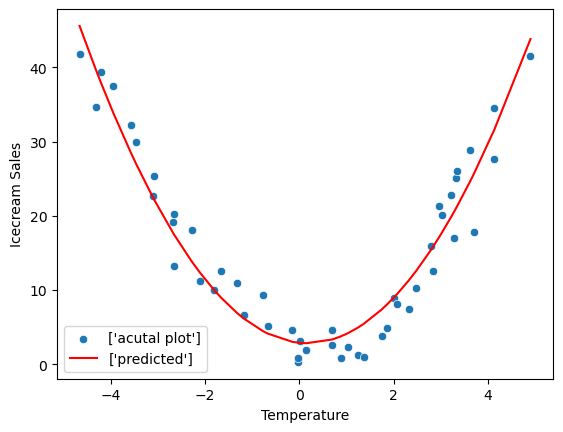

In [41]:
sns.scatterplot(data=dataset, x= dataset["Temperature (°C)"], y=dataset["Ice Cream Sales (units)"])
plt.plot(dataset["Temperature (°C)"], pred, c="red")
plt.legend([["acutal plot"], ["predicted"]])
plt.xlabel("Temperature")
plt.ylabel("Icecream Sales")
plt.show()